In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Processed_data.csv',index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dim_ratio,carat_category,cut_encoded,clarity_encoded,color_encoded,carat_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,1.631687,Low,4.0,1.0,1.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,1.673160,Low,3.0,2.0,1.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130,1.757576,Low,1.0,4.0,1.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138,1.602662,Low,3.0,3.0,5.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161,1.580000,Low,1.0,1.0,6.0,0.0


In [3]:
53785*0.05

2689.25

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'price_per_carat', 'dim_ratio', 'carat_category',
       'cut_encoded', 'clarity_encoded', 'color_encoded', 'carat_encoded'],
      dtype='object')

In [5]:
numerical_cols=['carat','cut_encoded', 'clarity_encoded', 'color_encoded', 'depth', 'table', 'volume', 'price_per_carat', 'dim_ratio',
         'price',]

In [6]:
df[numerical_cols].describe()

,carat,cut_encoded,clarity_encoded,color_encoded,depth,table,volume,price_per_carat,dim_ratio,price
count,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000,53787.000000
mean,0.797718,2.904196,3.051964,2.593917,61.748054,57.458001,129.902004,4009.397983,1.620572,3932.366167
std,0.473360,1.116044,1.646838,1.701163,1.429824,2.233257,78.166264,2013.120033,0.050082,3987.377762
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,31.707984,1051.162791,0.161478,326.000000
25%,0.400000,2.000000,2.000000,1.000000,61.000000,56.000000,65.220078,2478.431373,1.599359,951.000000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,114.855312,3496.296296,1.617073,2401.000000
75%,1.040000,4.000000,4.000000,4.000000,62.500000,59.000000,170.845492,4950.000000,1.638225,5325.000000
max,5.010000,4.000000,7.000000,6.000000,79.000000,95.000000,3840.598060,17828.846154,6.210280,18823.000000


#### Assumptions 
- Carat Column Might have few outliers because of mean and median has a difference of 9 and 75% and max have a big difference
- Depth can have outliers because 75% and max differs alot
- Table can have outliers because 75% and max differs alot

<Axes: >

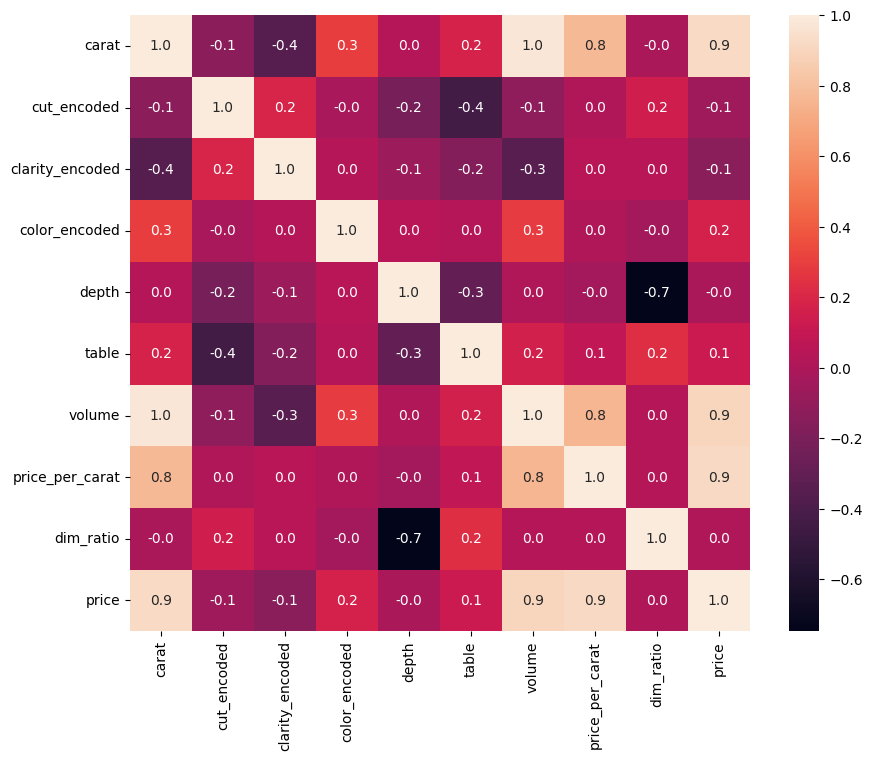

In [7]:
corr_matrix=df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".1f")

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'price_per_carat', 'dim_ratio', 'carat_category',
       'cut_encoded', 'clarity_encoded', 'color_encoded', 'carat_encoded'],
      dtype='object')

### Data Preparation For Tree Algorithms

In [9]:
tree_df=df[['carat','cut_encoded', 'clarity_encoded', 'color_encoded','depth','table','price']]
tree_df.to_csv('tree_Data.csv')

### Data Preparation For Algorithms Like Multiple,Polynomial,KNR and Support Vector Regressors

<Axes: xlabel='carat', ylabel='Density'>

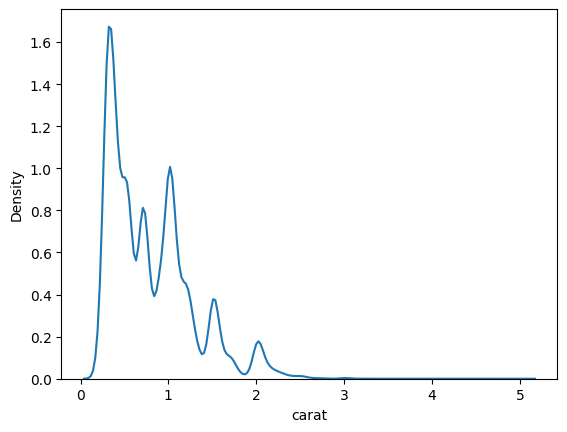

In [10]:
# plt.(df['carat'],20,histtype='stepfilled',)
sns.kdeplot(x='carat',data=df)

<Axes: ylabel='carat'>

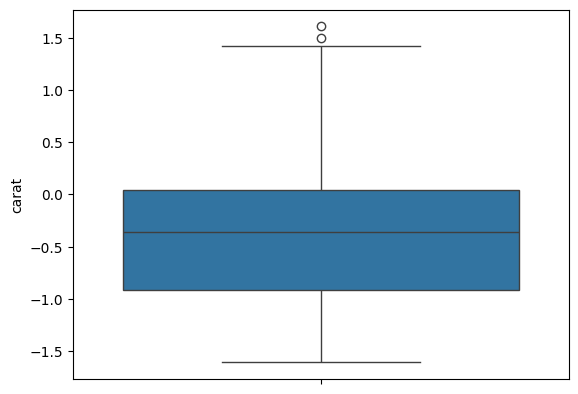

In [11]:
sns.boxplot(y=np.log(df['carat']))

In [12]:
df['log_carat'] = np.log1p(df['carat'])
Q1 = df['log_carat'].quantile(0.25)
Q3 = df['log_carat'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['log_carat'] >= lower_bound) & (df['log_carat'] <= upper_bound)]

<Axes: xlabel='log_carat', ylabel='Density'>

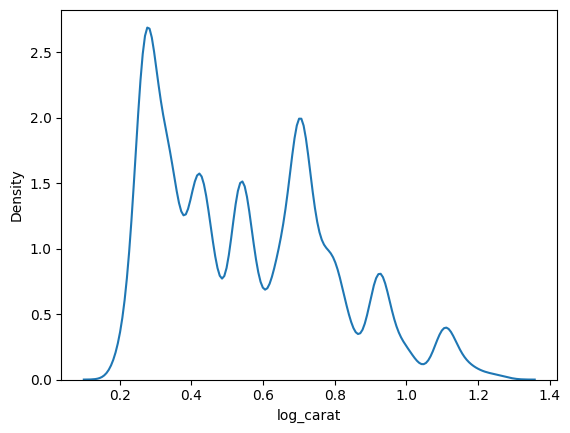

In [13]:
sns.kdeplot(x='log_carat',data=df)

In [14]:
other_algo=df[['log_carat','cut_encoded', 'clarity_encoded','depth', 'color_encoded','table','price']]
other_algo.shape


(53719, 7)

In [15]:
for i in other_algo.columns:
    print(i,other_algo[i].skew())


log_carat 0.5512440516476531
cut_encoded -0.7153710923511625
clarity_encoded 0.5523048126995324
depth -0.11750734341979392
color_encoded 0.19081567344224348
table 0.7922428352407054
price 1.6200540609143992


In [16]:
for i in other_algo.columns:
    print(i,other_algo[i].kurtosis())


log_carat -0.5575808219417202
cut_encoded -0.4009277658415753
clarity_encoded -0.39517838828121565
depth 5.435565679936962
color_encoded -0.8650853077390024
table 2.7822337515362467
price 2.1946729952083817


<Axes: xlabel='depth'>

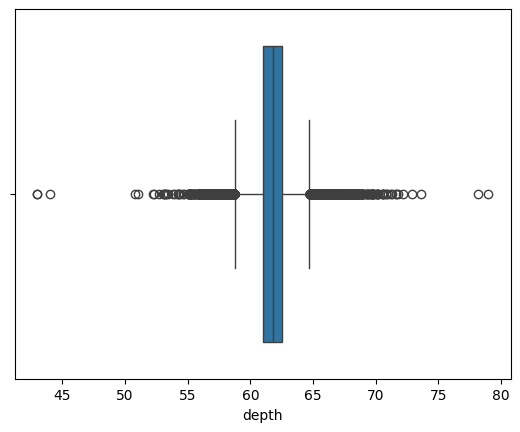

In [17]:
sns.boxplot(x='depth',data=other_algo)

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
other_algo['depth_yj'] = pt.fit_transform(other_algo[['depth']])  # note the double brackets [[]]


C:\Users\kevin\AppData\Local\Temp\ipykernel_3788\3419375155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_algo['depth_yj'] = pt.fit_transform(other_algo[['depth']])  # note the double brackets [[]]


In [19]:
print("Before:", other_algo['depth'].skew(), other_algo['depth'].kurtosis())
print("After :", other_algo['depth_yj'].skew(), other_algo['depth_yj'].kurtosis())


Before: -0.11750734341979392 5.435565679936962
After : 0.07151163001601663 5.384635891456419


In [20]:
from scipy.stats import kurtosis
kurtosis(other_algo['depth'])

5.434948077069768

In [21]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
other_algo['depth_ws'] = winsor.fit_transform(other_algo[['depth']])
other_algo['depth_ws'].kurtosis()


C:\Users\kevin\AppData\Local\Temp\ipykernel_3788\495358582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_algo['depth_ws'] = winsor.fit_transform(other_algo[['depth']])


0.15314422615087508

<Axes: xlabel='depth', ylabel='Density'>

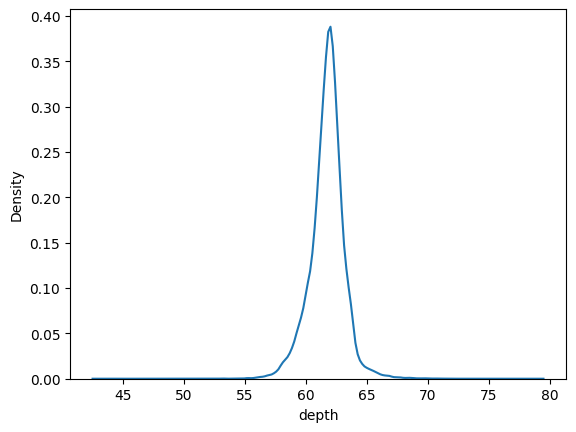

In [22]:
sns.kdeplot(x='depth',data=other_algo)

<Axes: xlabel='depth_ws', ylabel='Density'>

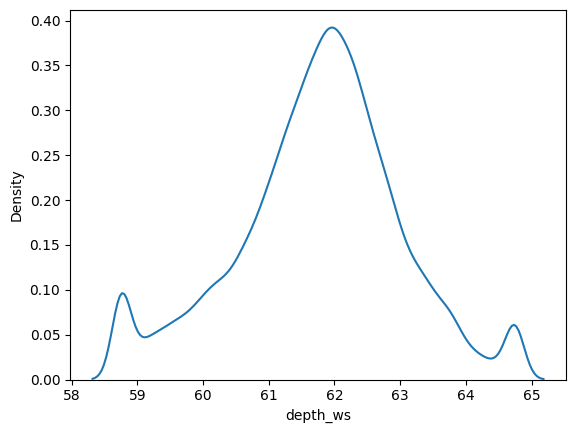

In [23]:
sns.kdeplot(x='depth_ws',data=other_algo)

In [24]:
other_algo=other_algo[['log_carat', 'cut_encoded', 'clarity_encoded', 'color_encoded', 'table','depth_ws',
       'price']]
other_algo.to_csv('other_algo.csv')

### Data Preparation for Clustering

In [25]:
# num=df.columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'price_per_carat', 'dim_ratio', 'carat_category',
       'cut_encoded', 'clarity_encoded', 'color_encoded', 'carat_encoded',
       'log_carat'],
      dtype='object')

In [26]:
cols=['carat','carat_encoded','cut_encoded', 'clarity_encoded','color_encoded','price_per_carat','depth','dim_ratio','volume','table','x','y','z','price']

In [27]:
clus_df=df[cols]

In [28]:
clus_df.to_csv('clustering_data.csv')

In [29]:
df.describe()

,carat,depth,table,price,x,y,z,volume,price_per_carat,dim_ratio,cut_encoded,clarity_encoded,color_encoded,carat_encoded,log_carat
count,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000,53719.000000
mean,0.794900,61.747095,57.456645,3918.801839,5.727588,5.731000,3.537425,129.456605,4008.234319,1.620595,2.905136,3.055083,2.591523,0.786444,0.554213
std,0.466673,1.427810,2.232307,3969.640226,1.112688,1.133932,0.698204,77.162525,2013.553781,0.050058,1.115276,1.645349,1.700037,0.629607,0.242955
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,1051.162791,0.161478,0.000000,0.000000,0.000000,0.000000,0.182322
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.190168,2477.303030,1.599379,2.000000,2.000000,1.000000,0.000000,0.336472
50%,0.700000,61.800000,57.000000,2399.000000,5.700000,5.710000,3.520000,114.791382,3494.000000,1.617089,3.000000,3.000000,3.000000,1.000000,0.530628
75%,1.040000,62.500000,59.000000,5309.500000,6.540000,6.530000,4.030000,170.668896,4946.720430,1.638223,4.000000,4.000000,4.000000,1.000000,0.712950
max,2.580000,79.000000,95.000000,18823.000000,9.080000,58.900000,31.800000,3840.598060,17828.846154,6.210280,4.000000,7.000000,6.000000,2.000000,1.275363
